<a href="https://colab.research.google.com/github/asafuM-56/Machine-Learning-Project/blob/main/Machine_Learning_Project_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# Import necessary libraries
!pip install shap -q

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap

#Load the dataset
actual_path = '/content/updated_DATASET (1).xlsx'
synth_path = '/content/synthetic_data.csv'

# Read the files into a Pandas DataFrame
act = pd.read_excel(actual_path)
synth = pd.read_csv(synth_path)

#Combine the datasets
df = pd.concat([act, synth], ignore_index=True)

print(df.head())  # Print the first few rows of the DataFrame

   TemP (K)  Time (min)  PS (mm)  BET (m2/g)  PV (cm3)  C (wt.%)  H  (wt.%)  \
0     315.0       150.0     9.82        3.43      0.02     30.84       2.14   
1     600.0        10.0     1.37       94.39      0.06     30.69       0.96   
2     800.0        10.0     1.37      120.86      0.08     28.81       0.47   
3     800.0       150.0     1.41      209.12      0.13     27.05       0.82   
4     800.0        10.0     3.69       10.82      0.02     35.35       0.72   

   N  (wt.%)  O  (wt.%)  Qm (mg/g)  ...  TP_Norfloxacin  TP_Oxytetracycline  \
0       0.43      20.32        4.4  ...             0.0                 0.0   
1       0.32      20.41        3.8  ...             0.0                 0.0   
2       0.33      19.29        8.5  ...             0.0                 0.0   
3       0.33       9.73       19.6  ...             0.0                 0.0   
4       2.47       2.01        4.3  ...             0.0                 0.0   

   TP_Oxytetracycline   TP_Salicylic acid  TP_Sulf

From previous iterations of this project, will drop H (%) and PS (mm) due to their low impact on Qm (mg/g)

In [67]:
df = df.drop(['H  (wt.%)', 'PS (mm)'], axis = 1)

print(df.head())

   TemP (K)  Time (min)  BET (m2/g)  PV (cm3)  C (wt.%)  N  (wt.%)  O  (wt.%)  \
0     315.0       150.0        3.43      0.02     30.84       0.43      20.32   
1     600.0        10.0       94.39      0.06     30.69       0.32      20.41   
2     800.0        10.0      120.86      0.08     28.81       0.33      19.29   
3     800.0       150.0      209.12      0.13     27.05       0.33       9.73   
4     800.0        10.0       10.82      0.02     35.35       2.47       2.01   

   Qm (mg/g)  TP_Benzocaine  TP_Ciprofloxacin  ...  TP_Norfloxacin  \
0        4.4            0.0               0.0  ...             0.0   
1        3.8            0.0               0.0  ...             0.0   
2        8.5            0.0               0.0  ...             0.0   
3       19.6            0.0               0.0  ...             0.0   
4        4.3            0.0               0.0  ...             0.0   

   TP_Oxytetracycline  TP_Oxytetracycline   TP_Salicylic acid  \
0                 0.0      

Missing Data

In [68]:
#Check for missing data
print(df.isna().sum())

#Check for the number of rows and column
num_rows, num_cols = df.shape

print('Number of Rows = ', num_rows)
print('Number of Columns = ', num_cols)

TemP (K)               0
Time (min)             0
BET (m2/g)             0
PV (cm3)               0
C (wt.%)               0
N  (wt.%)              0
O  (wt.%)              0
Qm (mg/g)              0
TP_Benzocaine          0
TP_Ciprofloxacin       0
TP_Citalopram          0
TP_Diclofenac          0
TP_Dimetridazole       0
TP_Floxentine          0
TP_Metronidazole       0
TP_Nitroimidazole      0
TP_Norfloxacin         0
TP_Oxytetracycline     0
TP_Oxytetracycline     0
TP_Salicylic acid      0
TP_Sulfadiazine        0
TP_Sulfamethoxazole    0
TP_Tetracycline        0
TP_Triclosan           0
TP_ibuprofen           0
TP_sulfamethazine      0
dtype: int64
Number of Rows =  4451
Number of Columns =  26


No Missing Data so moving on to outliers


Excluding All TP Columns from the outlier search

In [69]:
outlier_cols = ['TemP (K)', 'Time (min)', 'BET (m2/g)', 'PV (cm3)', 'C (wt.%)', 'N  (wt.%)', 'O  (wt.%)', 'Qm (mg/g)']
df[outlier_cols] = df[outlier_cols].astype('float32')

Handling Outliers

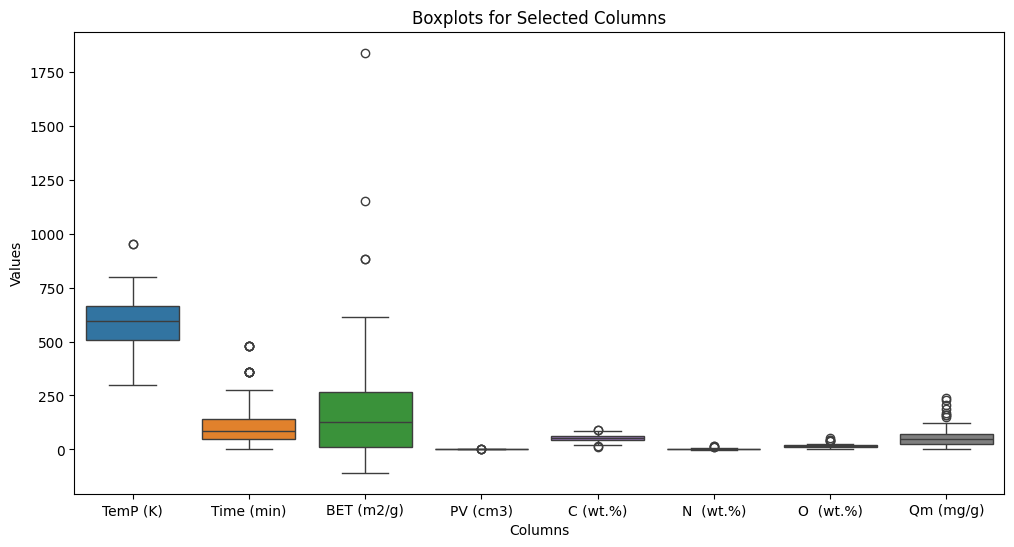

Outliers detected in the following columns:
TemP (K)       2
Time (min)    12
BET (m2/g)     4
PV (cm3)       4
C (wt.%)       4
N  (wt.%)      4
O  (wt.%)      5
Qm (mg/g)      8
dtype: int64


In [70]:
#Looking for outliers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the interquartile range (IQR) for each column
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 1.5 * IQR

# Identify outliers
outliers = (df[outlier_cols] < (Q1 - outlier_threshold)) | (df[outlier_cols] > (Q3 + outlier_threshold))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=df[outlier_cols], ax=ax)

# Set labels and title
ax.set_title('Boxplots for Selected Columns')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

plt.show()

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

Drop rows with outliers

In [71]:
# Calculate the interquartile range (IQR) for each column
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
outlier_threshold = 2 * IQR

# Identify outliers
outliers = (df[outlier_cols] < (Q1 - outlier_threshold)) | (df[outlier_cols] > (Q3 + outlier_threshold))

# Drop rows containing outliers
df = df[~outliers.any(axis=1)]

#Re-identifying the outliers for display purposes
outliers = (df[outlier_cols] < (Q1 - outlier_threshold)) | (df[outlier_cols] > (Q3 + outlier_threshold))

# Check if outliers exist
if outliers.any().any():
    print("Outliers detected in the following columns:")
    print(outliers.sum())
else:
    print("No outliers detected.")

No outliers detected.


Check for duplicates

In [72]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()
# If there are any duplicates, the 'duplicates' variable will contain True for those rows
if duplicates.any():
    # Get the rows with duplicates
    duplicate_rows = df[duplicates]
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


Make a heatmap

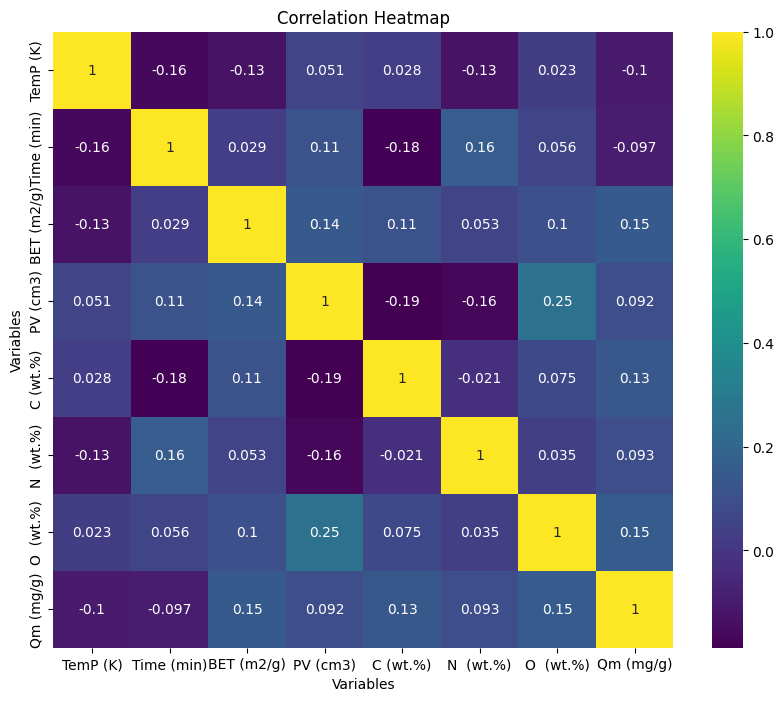

In [73]:
#Redefining cause I have to
outlier_cols = ['TemP (K)', 'Time (min)', 'BET (m2/g)', 'PV (cm3)', 'C (wt.%)', 'N  (wt.%)', 'O  (wt.%)', 'Qm (mg/g)']
df[outlier_cols] = df[outlier_cols].astype('float32')
corr_df = df[outlier_cols]

#Make the correlation matrix
correlation_matrix = corr_df.corr()

#Making the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")

# Set the title and labels
plt.title("Correlation Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show the plot
plt.show()

No variable appears so correlated that any of the data is redundant

Training the models

Random Forest:
  Average RMSE: 26.688
  Average MAE: 22.823
  Average R² Test Score: 0.056
  Average R² Train Score: 0.868
 
Gradient Boosting:
  Average RMSE: 26.497
  Average MAE: 22.665
  Average R² Test Score: 0.070
  Average R² Train Score: 0.551
 
MLP:
  Average RMSE: 26.614
  Average MAE: 22.747
  Average R² Test Score: 0.062
  Average R² Train Score: 0.387
 
SVR:
  Average RMSE: 26.701
  Average MAE: 22.853
  Average R² Test Score: 0.056
  Average R² Train Score: 0.300
 
Linear Regression:
  Average RMSE: 26.624
  Average MAE: 22.778
  Average R² Test Score: 0.061
  Average R² Train Score: 0.259
 


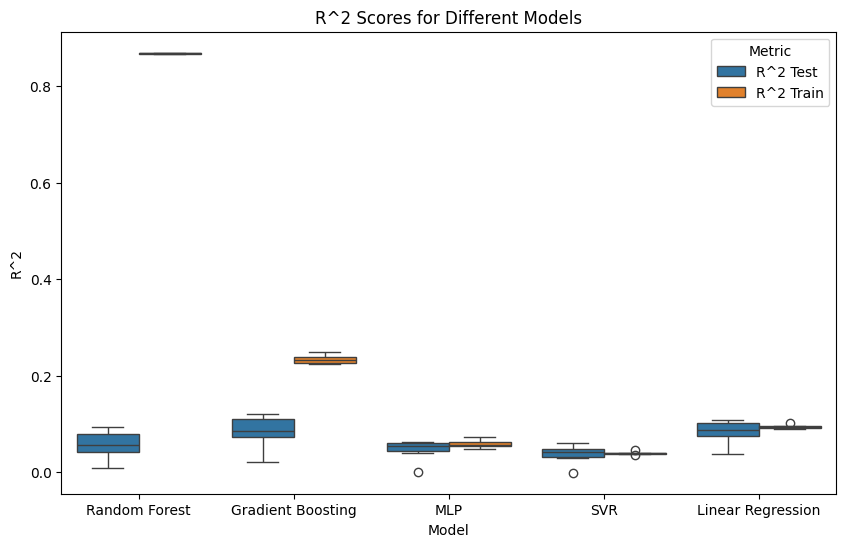

In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the dataset into features and target
X = df.drop('Qm (mg/g)', axis=1)
Y = df['Qm (mg/g)']

# Define the number of folds for K-Fold cross-validation
n_folds = 6

# Initialize empty lists to store evaluation metrics
rmse_scores = []
mae_scores = []
r2_test_scores = []
r2_train_scores = []

# Define the models dictionary
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'MLP': MLPRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
}

# K-Fold cross-validation loop
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
for name, model in models.items():
    # Loop through each fold
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        # Train the model on the training data for this fold
        model.fit(X_train, y_train)

        # Predict on the testing data for this fold
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE directly
        mae = mean_absolute_error(y_test, y_pred)
        r2_test = r2_score(y_test, y_pred)

        # Additionally, calculate R-squared on the training data for each fold (optional)
        y_train_pred = model.predict(X_train)
        r2_train = r2_score(y_train, y_train_pred)

        # Calculate R^2 difference
        r2_diff = r2_train - r2_test

        # Append the scores to the lists
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_test_scores.append(r2_test)
        r2_train_scores.append(r2_train)

    # Print average scores after all folds for each model
    print(f"{name}:")
    print(f"  Average RMSE: {np.mean(rmse_scores):.3f}")
    print(f"  Average MAE: {np.mean(mae_scores):.3f}")
    print(f"  Average R² Test Score: {np.mean(r2_test_scores):.3f}")
    print(f"  Average R² Train Score: {np.mean(r2_train_scores):.3f}")
    print(' ')

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
              'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting', 'Gradient Boosting',
              'MLP', 'MLP', 'MLP', 'MLP', 'MLP', 'MLP',
              'SVR', 'SVR', 'SVR', 'SVR', 'SVR', 'SVR',
              'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression', 'Linear Regression'],
    'R^2 Test': r2_test_scores,
    'R^2 Train': r2_train_scores,
})

# Melt the DataFrame for easier plotting
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='R^2')

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='R^2', hue='Metric', data=melted_df)
plt.title('R^2 Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.legend(title='Metric')
plt.show()

Based on the data I am going to choose to optimize the parameters of the Random Forest Model

Hyperparameter tuning using Bayesian Optimization

In [75]:
!pip install scikit-optimize -q
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter search space
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 11, 2),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': np.linspace(0.6, 1.0, 5)
}

# Create a Bayesian Optimization object
opt = BayesSearchCV(
    GradientBoostingRegressor(),
    param_grid,
    n_iter=10,  # Number of iterations is lower for the sake of time
    cv=6,  # Cross-validation folds
    random_state=42
)

# Fit the optimizer to your data
opt.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best parameters:", opt.best_params_)
print("Best score:", opt.best_score_)

Best parameters: OrderedDict([('max_depth', 3), ('min_samples_leaf', 4), ('min_samples_split', 10), ('n_estimators', 226)])
Best score: 0.031706244824656706


Hyperparameter Tuning using Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 11, 2),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': np.linspace(0.6, 1.0, 5)
}

# Create a Grid Search object
grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)

# Fit the Grid Search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

KeyboardInterrupt: 

Hyperparameter tuning using Random Search

In [77]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 11, 2),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': np.linspace(0.6, 1.0, 5)
}

# Create a Random Search object
random_search = RandomizedSearchCV(GradientBoostingRegressor(), param_grid, n_iter=30, cv=5)

# Fit the Random Search object to the data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3}
Best score: 0.056476480841095356


Using the optimal parameters given by tunning

In [78]:
# Define the number of folds for K-Fold cross-validation
n_folds = 10  # You can adjust this value based on your needs

# K-Fold cross-validation loop
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Assuming you've already performed hyperparameter tuning and obtained the best parameters
best_params = {
    'n_estimators': 100,
    'learning_rate': 0.3,
    'max_depth': 3,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'subsample': 0.9
}

# Create a Random Forest Regressor with the best parameters
gb_model = GradientBoostingRegressor(**best_params)

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the model on the training data for this fold
    gb_model.fit(X_train, y_train)

    # Predict on the testing data for this fold
    y_pred = gb_model.predict(X_test)

    # Calculate evaluation metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE directly
    mae = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    # Additionally, calculate R-squared on the training data for each fold (optional)
    y_train_pred = gb_model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)

    # Append the scores to the lists
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    r2_test_scores.append(r2_test)
    r2_train_scores.append(r2_train)

# Print average scores after all folds for each model
print(f"Gradient Boost after Tuning:")
print(f"  Average RMSE: {np.mean(rmse_scores):.3f}")
print(f"  Average MAE: {np.mean(mae_scores):.3f}")
print(f"  Average R² Test Score: {np.mean(r2_test_scores):.3f}")
print(f"  Average R² Train Score: {np.mean(r2_train_scores):.3f}")
print(' ')

Gradient Boost after Tuning:
  Average RMSE: 26.737
  Average MAE: 22.803
  Average R² Test Score: 0.053
  Average R² Train Score: 0.291
 


Saving the model

In [79]:
import pickle

# Save the best model as a pickel
with open('best_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

Interpretability plot

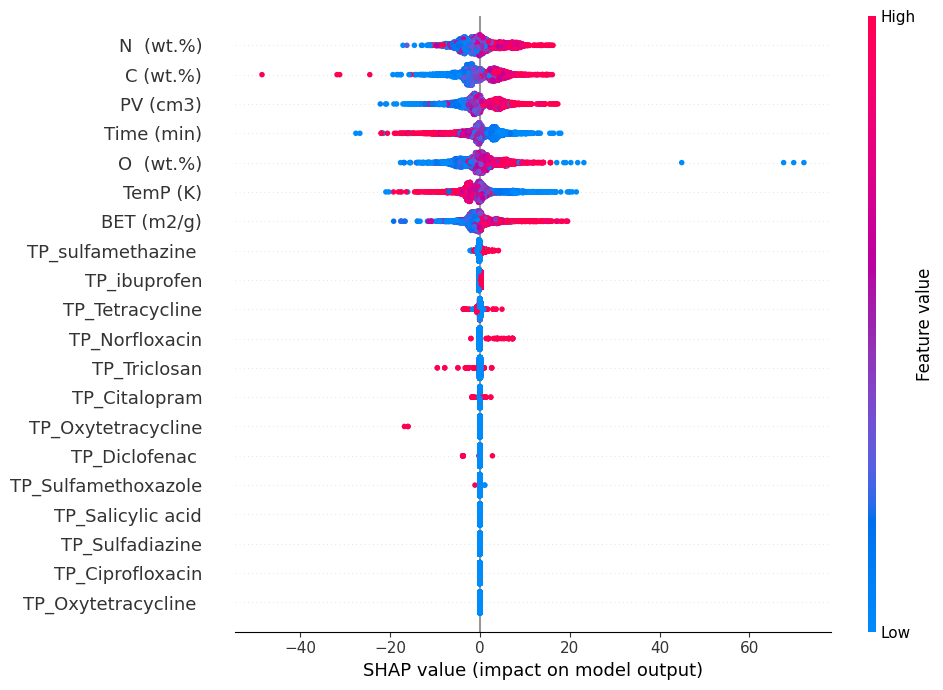

In [87]:
def plot_shap(data, target_column, model):
    x = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # SHAP summary plot
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train,
                    plot_size= (10,7))

# define model to use
plot_shap(df,'Qm (mg/g)',gb_model)